In [2]:

import numpy as np 
import pandas as pd 


In [3]:
df_twitter=pd.read_csv("dataset/train.csv")

In [4]:
df_twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


C:\Users\acer\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


<AxesSubplot:xlabel='label', ylabel='count'>

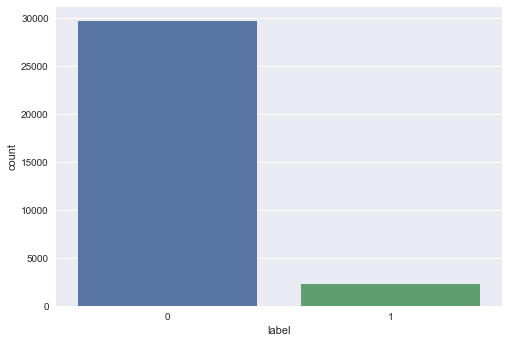

In [5]:
import seaborn as sns
sns.countplot('label',data=df_twitter)

In [6]:
df_offensive=pd.read_csv("dataset/labeled_data.csv")

In [7]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [8]:
df_offensive.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [9]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

In [10]:
df_offensive[df_offensive['class']==0]['class']=1

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
df_offensive.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

In [13]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [14]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [15]:
df_offensive['class'].unique()

array([2, 1], dtype=int64)

<AxesSubplot:xlabel='class', ylabel='count'>

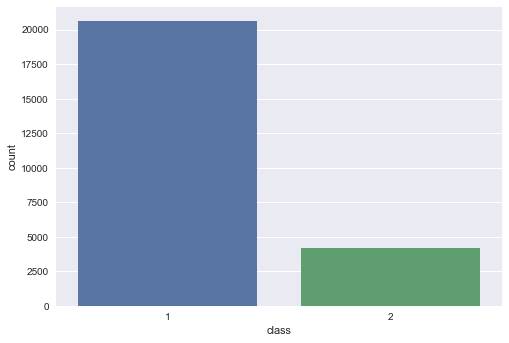

In [16]:
sns.countplot('class',data=df_offensive)

In [17]:
df_offensive[df_offensive['class']==0]

,class,tweet


In [18]:
df_offensive["class"].replace({2: 0}, inplace=True)

<AxesSubplot:xlabel='class', ylabel='count'>

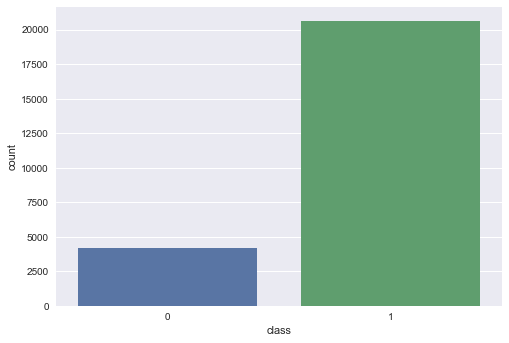

In [19]:
sns.countplot('class',data=df_offensive)

In [20]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)
   

In [21]:
df_offensive.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [22]:
df_offensive.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [23]:
df_offensive.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [24]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

ipykernel_launcher:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [25]:
df.head()

,id,label,tweet
0,1.0,0,@user when a father is dysfunctional and is s...
1,2.0,0,@user @user thanks for #lyft credit i can't us...
2,3.0,0,bihday your majesty
3,4.0,0,#model i love u take with u all the time in ...
4,5.0,0,factsguide: society now #motivation


<AxesSubplot:xlabel='label', ylabel='count'>

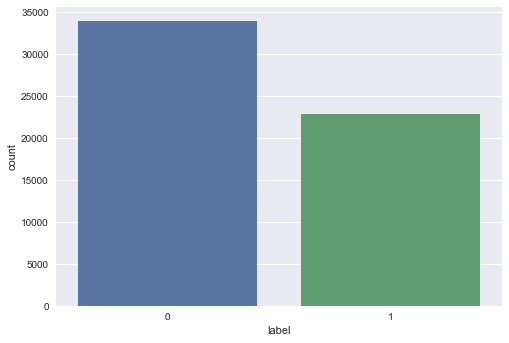

In [26]:
sns.countplot('label',data=df)

In [27]:
df.shape

(56745, 3)

In [28]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [30]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


In [31]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df['tweet']=df['tweet'].apply(clean_text)

In [32]:
df_x = df["tweet"]
df_y = df["label"]

In [33]:
cv = CountVectorizer()
ex = cv.fit_transform(["Hello baby gitl", "My Nigga wetin dey"])

In [34]:
ex.toarray()

array([[1, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1]], dtype=int64)

In [35]:
cv.get_feature_names()

['baby', 'dey', 'gitl', 'hello', 'my', 'nigga', 'wetin']

In [36]:
corpus = df_x
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [37]:
cv.get_feature_names()

['aa',
 'aaa',
 'aaaaa',
 'aaaaaaaaand',
 'aaaaaand',
 'aaaaah',
 'aaaaand',
 'aaahh',
 'aaahhhh',
 'aaahhhhh',
 'aaand',
 'aaawwwww',
 'aaberg',
 'aadityaji',
 'aah',
 'aahahah',
 'aakhri',
 'aal',
 'aalivyahsimonã',
 'aaliyah',
 'aaliyahhhm',
 'aaliyahhlove',
 'aamaadmiparti',
 'aamaadmipay',
 'aameer',
 'aamirkhan',
 'aamp',
 'aamph',
 'aampm',
 'aampt',
 'aamu',
 'aan',
 'aand',
 'aap',
 'aapi',
 'aaptard',
 'aarakshan',
 'aarhus',
 'aaron',
 'aaroncart',
 'aaronkeplin',
 'aaronmacgrud',
 'aaronorenta',
 'aaronrhod',
 'aaronthegoat',
 'aaronworth',
 'aarya',
 'aaryn',
 'aaryneliza',
 'aarynelizagri',
 'aascf',
 'aasthaxoxo',
 'aayat',
 'ab',
 'aba',
 'abandon',
 'abandonado',
 'abantu',
 'abartick',
 'abasel',
 'abba',
 'abbey',
 'abbeygoldd',
 'abbeykirkland',
 'abbeykuck',
 'abbi',
 'abbibucket',
 'abbotabad',
 'abbott',
 'abbu',
 'abbyybell',
 'abc',
 'abcdiscov',
 'abcrispyyandi',
 'abd',
 'abdashcol',
 'abdelka',
 'abdomin',
 'abduct',
 'abdullah',
 'abdullahomar',
 'abdurahma

In [38]:
#spliting databetween test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.3, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
#model fitting(training)
clf.fit(X_train, y_train)
#model testing
print("accuracy:"+str(clf.score(X_test, y_test)))

accuracy:0.9459586466165414


C:\Users\acer\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
from sklearn.ensemble import RandomForestClassifier
Rclf = RandomForestClassifier(n_estimators = 100)
Rclf.fit(X_train, y_train)
print("accuracy:"+str(Rclf.score(X_test, y_test)))

accuracy:0.9427279135338346


In [41]:
df.head()

,id,label,tweet
0,1.0,0,user father dysfunct selfish drag kid dysfunc...
1,2.0,0,user user thank lyft credit cant use caus dont...
2,3.0,0,bihday majesti
3,4.0,0,model love u take u time urð± ððð...
4,5.0,0,factsguid societi motiv


In [42]:
x=df['tweet']
y=df['label']

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

42558 42558
14187 14187


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [45]:
x_test_vectorizer=count.transform(x_test)
#x_train_vectorizer.toarray()


In [46]:
count.vocabulary_


{'pictur': 496965,
 'galleri': 244789,
 'live': 386374,
 'blackcavali': 78353,
 'caucasian': 105699,
 'webcam': 750931,
 'pictur galleri': 497099,
 'galleri live': 244792,
 'live blackcavali': 386462,
 'blackcavali caucasian': 78354,
 'caucasian webcam': 105705,
 'pictur galleri live': 497100,
 'galleri live blackcavali': 244793,
 'live blackcavali caucasian': 386463,
 'blackcavali caucasian webcam': 78355,
 'pictur galleri live blackcavali': 497101,
 'galleri live blackcavali caucasian': 244794,
 'live blackcavali caucasian webcam': 386464,
 'pictur galleri live blackcavali caucasian': 497102,
 'galleri live blackcavali caucasian webcam': 244795,
 'shoutout': 600018,
 'everybodi': 198100,
 'follow': 226779,
 'nicca': 455780,
 'shoutout everybodi': 600045,
 'everybodi follow': 198226,
 'follow nicca': 227264,
 'shoutout everybodi follow': 600046,
 'everybodi follow nicca': 198227,
 'shoutout everybodi follow nicca': 600047,
 'user': 703467,
 'bet': 56640,
 'second': 586131,
 'goal': 25

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential



In [49]:
#data->clean->vectorize->tokenize->input deep learning model->output


max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [50]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [52]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=10,
          validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10
21/34 [=================>............] - ETA: 3:38 - loss: 0.6160 - accuracy: 0.6612

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,y_test)


In [ ]:
lstm_prediction=model.predict(test_sequences_matrix)


In [ ]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [ ]:
print(confusion_matrix(y_test,res))


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save("hate&abusive_model.h5")

In [ ]:
import keras

In [ ]:
load_model=keras.models.load_model("./hate&abusive_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

NameError: name 'keras' is not defined

In [ ]:
test = 'I hate my country'
def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
test=[clean_text(test)]
print(test)
seq = load_tokenizer.texts_to_sequences(test)
padded = sequence.pad_sequences(seq, maxlen=300)
print(seq)
pred = load_model.predict(padded)
print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")